<a href="https://colab.research.google.com/github/rymuelle/CFB_pytorch_toy_minimizer/blob/master/clean_team_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import files, drive
import os
import math
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn

dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda:0")

Mount drive and get our game CSV:

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
team_history=pd.read_csv('/content/drive/My Drive/Colab Notebooks/CFB_pytorch_toy_minimizer/team_history_prior.csv')
team_history

,team,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Virginia,56.218224,57.634155,51.259979,55.099541,46.208427,42.816223,39.692951,48.873753,52.484528,56.816620,47.511570,38.943901,43.154022,38.749882,36.430931,32.440731,33.786793,29.997833,25.191860,37.367573,34.448063,27.364101,30.464144,39.577229,40.470589
1,Rocky Mtn,-38.717487,-17.620222,-20.533848,-7.097942,-2.887386,-17.078531,-26.195095,-27.137554,-30.853399,-37.668503,-33.101185,-32.563507,-27.494164,-25.504488,-21.313812,-15.438066,-16.550310,-17.288315,-8.895834,-14.910691,-21.089167,-23.562651,-14.480546,-6.131647,-26.008608
2,Boston College,42.258953,38.119411,35.124268,40.063679,40.715084,48.417175,52.860954,52.147476,47.962749,46.445374,52.639900,50.498695,48.185688,44.614372,43.804432,38.277180,33.154850,28.399715,33.874149,39.260445,35.656300,29.483124,41.085209,41.608356,33.609016
3,Appalachian St,26.782879,22.299517,23.727081,25.376507,29.533756,31.279825,27.969292,23.109306,17.383862,17.784161,29.634516,34.037361,33.526340,31.878578,28.291296,26.643030,18.825008,20.310329,11.766082,22.481869,34.867653,36.000874,34.195354,41.789104,42.950077
4,Ball St,34.088524,38.733631,32.332634,19.765236,16.668686,21.699640,27.220036,27.781195,25.603275,18.912823,21.527466,31.982611,34.510197,39.986687,23.048784,17.427259,22.132940,29.923170,34.295639,23.990997,15.940012,19.355339,3.871175,15.872072,26.599550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,Washington & Lee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-25.239401
1054,CO Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.568953
1055,Lenoir-Rhyne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.369897
1056,Marquette,-88.305916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create list of FBS teams:

In [5]:
fbs_teams = ["Clemson","Alabama","Texas","Air Force","Akron","Appalachian St","Arizona","Arizona St","Arkansas","Arkansas St","Army","Auburn","BYU","Ball St","Baylor","Boise St","Boston College","Bowling Green","Buffalo","C Michigan","California","Charlotte","Cincinnati","Coastal Car","Colorado","Colorado St","Connecticut","Duke","E Michigan","East Carolina","FL Atlantic","Florida","Florida Intl","Florida St","Fresno St","Ga Southern","Georgia","Georgia St","Georgia Tech","Hawaii","Houston","Illinois","Indiana","Iowa","Iowa St","Kansas","Kansas St","Kent","Kentucky","LSU","Liberty","Louisiana","Louisiana Tech","Louisville","MTSU","Marshall","Maryland","Massachusetts","Memphis","Miami FL","Miami OH","Michigan","Michigan St","Minnesota","Mississippi","Mississippi St","Missouri","N Illinois","NC State","Navy","Nebraska","Nevada","New Mexico","New Mexico St","North Carolina","North Texas","Northwestern","Notre Dame","Ohio","Ohio St","Oklahoma","Oklahoma St","Old Dominion","Oregon","Oregon St","Penn St","Pittsburgh","Purdue","Rice","Rutgers","SMU","San Diego St","San Jose St","South Alabama","South Carolina","South Florida","Southern Miss","Stanford","Syracuse","TCU","Temple","Tennessee","Texas A&M","Texas St","Texas Tech","Toledo","Troy","Tulane","Tulsa","UAB","UCF","UCLA","ULL","ULM","UNLV","USC","UT San Antonio","UTEP","Utah","Utah St","Vanderbilt","Virginia","Virginia Tech","W Michigan","WKU","Wake Forest","Washington","Washington St","West Virginia","Wisconsin","Wyoming"]

In [6]:
fbs_history = team_history[team_history.team.isin(fbs_teams)]

In [7]:
seasons=np.linspace(1995,2019,2019-1995+1,dtype=int)
#seasons=np.linspace(2017,2019,2019-2017+1,dtype=int)
for index, season in enumerate(seasons):
  print(season)
  print(fbs_history[str(season)].mean(),fbs_history[str(season)].std())
  mean = fbs_history[str(season)].mean()
  fbs_history[str(season)]=fbs_history[str(season)].subtract(mean)

1995
40.646333094470755 16.05873864342354
1996
40.41969909352704 16.20315541049332
1997
40.27454289549687 15.758266252418785
1998
40.553894039060246 14.817712617589123
1999
40.90892592805331 14.027089677862458
2000
40.84242019081702 14.382950205428342
2001
40.21726690899066 15.02778997547015
2002
39.50342676428057 15.128520983731487
2003
38.72711653518677 15.44223391132927
2004
38.597301789283755 14.365447544614575
2005
38.50677729415894 14.20925296209438
2006
37.93998241996765 13.19442477184693
2007
37.299192615509035 12.9116617942253
2008
37.026499019622804 13.17513907509963
2009
36.1821540783322 13.4620039728132
2010
35.00836911611259 14.445520726409152
2011
34.37211744729863 14.507731766464465
2012
34.213601648345474 13.637375818918725
2013
33.662725437604465 14.898954560075717
2014
33.64853567893689 13.80926845782442
2015
33.71088577056116 13.80446044006021
2016
33.4940756568613 13.424029082692797
2017
33.06594475049239 13.840327040065835
2018
33.600481572517985 13.253173208560485

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


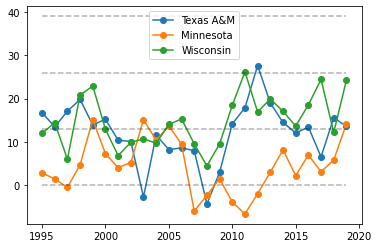

In [8]:
teamlist=["Texas A&M", "Texas", "Clemson", "Alabama", "Ohio St"]
teamlist=["LSU","Georgia", "Alabama","Clemson", "Ohio St", "Oklahoma"]
teamlist=["Texas A&M", "Texas", "Clemson","Oklahoma"]
teamlist=["Texas A&M", "Minnesota", "Wisconsin"]
levels = [13*3-13*n for n in np.arange(7)]
x=[seasons[0],seasons[-1]]
for team in teamlist:
  plt.plot(seasons,fbs_history[fbs_history['team']==team].to_numpy()[0][1:],'o-',label=team)
for level in levels:
  y=[level,level]
  if level > -13:
    plt.plot(x,y,'--',color='k',alpha=0.3)
plt.legend()

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
test_data_size = 2
for team in fbs_history.team:
   ratings = fbs_history[fbs_history['team']==team].to_numpy()[0][1:]
   if not np.isnan(np.sum(ratings)):
    scaler.partial_fit(np.array(ratings[:-test_data_size]).reshape(-1,1))
scaler.get_params()

{'copy': True, 'feature_range': (-1, 1)}

In [10]:
team_dict = {}
for team in fbs_history.team:
  ratings = fbs_history[fbs_history['team']==team].to_numpy()[0][1:]
  if not math.isnan(ratings.mean()):
    team_dict[team]={}
    train_array=np.array(ratings[:-test_data_size]).reshape(-1,1)
    train_array=scaler.transform(train_array).reshape(-1, 1)
    team_dict[team]['train']=train_array
    team_dict[team]['test']=ratings[-test_data_size:]

In [11]:
for team in team_dict:
  team_dict[team]['train'] = torch.FloatTensor(team_dict[team]['train']).to(device).view(-1)

Ok, so now we have a dict of series, lets try and predict make an lstm

In [12]:
class LSTM(nn.Module):
  def __init__(self, input_size=1, hidden_layer_size=10, output_size=1):
    super().__init__()
    self.hidden_layer_size=hidden_layer_size

    self.lstm=nn.LSTM(input_size,hidden_layer_size)

    self.linear=nn.Linear(hidden_layer_size,output_size)

    self.hidden_cell=(torch.zeros(1,1,self.hidden_layer_size),
                      torch.zeros(1,1,hidden_layer_size))
  def forward(self, input_seq):
    lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq),1,-1),
                                           self.hidden_cell)
    predictions = self.linear(lstm_out.view(len(input_seq),-1))
    return predictions[-1]

torch.manual_seed(1)

In [13]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [14]:
train_window = 10

In [15]:
for team in team_dict:
  seq=team_dict[team]['train']
  train_inout_seq = create_inout_sequences(seq, train_window)  
  team_dict[team]['train']=train_inout_seq

In [16]:
model=LSTM().to(device)
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-4)
print(model)

LSTM(
  (lstm): LSTM(1, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


In [17]:
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5
torch.cat(inputs).view(len(inputs), 1, -1)

tensor([[[ 0.5496,  0.3409,  2.1349]],

        [[-1.4792, -1.8716,  0.6139]],

        [[-1.2945, -1.5406, -0.1921]],

        [[-0.9269,  0.1399,  2.4266]],

        [[-0.8143,  0.1058, -1.3097]]])

In [19]:
epochs=1
optimizer=torch.optim.Adam(model.parameters(), lr=1e-4)
for i in range(epochs):
  loss = []
  for team in team_dict:
    train_inout_seq = np.array(team_dict[team]['train'])
    y=torch.stack(tuple(train_inout_seq.T[1]))
    x=torch.stack(tuple(train_inout_seq.T[0]))
    x=x.view(len(x), 1, -1)
    model.hidden_cell=(torch.zeros(1,1,model.hidden_layer_size).to(device),
                       torch.zeros(1,1,model.hidden_layer_size).to(device))

    x=torch.nn.utils.rnn.pack_padded_sequence(x, batch_first=True, lengths=[10 for _ in range(len(x))])
    print(x)
    x, model.hidden_cell, = model.lstm(x,model.hidden_cell)
    print(y_pred)
    break
    for seq, labels in train_inout_seq:
      optimizer.zero_grad()
      model.hidden_cell=(torch.zeros(1,1,model.hidden_layer_size).to(device),
                       torch.zeros(1,1,model.hidden_layer_size).to(device))
      y_pred = model(seq)
      single_loss=loss_function(y_pred,labels)
      single_loss.backward()
      loss.append(single_loss.item())
      optimizer.step()
  if i%10==1:
    print(f'epoch: {i:3} loss: {np.average(loss):10.8f}')

#print(f'epoch: {i:3} loss: {np.average(loss):10.10f}')

PackedSequence(data=tensor([[ 0.3867,  0.4210,  0.2909,  0.3653,  0.1721,  0.1026,  0.0504,  0.2571,
          0.3488,  0.4420],
        [ 0.4210,  0.2909,  0.3653,  0.1721,  0.1026,  0.0504,  0.2571,  0.3488,
          0.4420,  0.2495],
        [ 0.2909,  0.3653,  0.1721,  0.1026,  0.0504,  0.2571,  0.3488,  0.4420,
          0.2495,  0.0824],
        [ 0.3653,  0.1721,  0.1026,  0.0504,  0.2571,  0.3488,  0.4420,  0.2495,
          0.0824,  0.1837],
        [ 0.1721,  0.1026,  0.0504,  0.2571,  0.3488,  0.4420,  0.2495,  0.0824,
          0.1837,  0.0974],
        [ 0.1026,  0.0504,  0.2571,  0.3488,  0.4420,  0.2495,  0.0824,  0.1837,
          0.0974,  0.0666],
        [ 0.0504,  0.2571,  0.3488,  0.4420,  0.2495,  0.0824,  0.1837,  0.0974,
          0.0666,  0.0077],
        [ 0.2571,  0.3488,  0.4420,  0.2495,  0.0824,  0.1837,  0.0974,  0.0666,
          0.0077,  0.0491],
        [ 0.3488,  0.4420,  0.2495,  0.0824,  0.1837,  0.0974,  0.0666,  0.0077,
          0.0491, -0.0267],

RuntimeError: ignored

In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/Colab Notebooks/CFB_pytorch_toy_minimizer/lstm_first.torch')

In [ ]:
fut_pred=2
team_pred_dict={}
for team in fbs_history.team:
  ratings = fbs_history[fbs_history['team']==team].to_numpy()[0][1:]
  if not math.isnan(ratings.mean()):
    train_array=np.array(ratings[:-test_data_size]).reshape(-1,1)
    train_array=scaler.transform(train_array).reshape(-1, 1).flatten()[-train_window:].tolist()
    model.eval()
    for i in range(fut_pred):
      seq=torch.cuda.FloatTensor(train_array[-train_window:])
      with torch.no_grad():
        model.hidden=(torch.zeros(1,1, model.hidden_layer_size).to(device),
                  torch.zeros(1,1,model.hidden_layer_size).to(device))
        train_array.append(model(seq).item())
    predictions = train_array[-fut_pred:]
    reshaped_prediction=np.array(predictions).reshape(-1,1)
    inverse_pred=scaler.inverse_transform(reshaped_prediction)
    last_value=scaler.inverse_transform(np.array(train_array).reshape(-1,1))
    team_pred_dict[team]={}
    team_pred_dict[team]['lstm_pred'] = [pred[0] for pred in inverse_pred]
    team_pred_dict[team]['actual'] = [pred for pred in team_dict[team]['test']]
    team_pred_dict[team]['last'] =  [(last_value[-fut_pred-1][0]*.75+last_value[-fut_pred-2][0]*.25) for _ in range(fut_pred)]
    team_pred_dict[team]['whole_hist'] = fbs_history[fbs_history['team']==team].to_numpy()[0][1:]
    #print(fbs_history[fbs_history['team']==team].to_numpy()[0][1:])
team_pred_dict



In [ ]:
lstm_list=[]
last_list=[]
for team in team_dict:
  last = team_pred_dict[team]['last'][0]
  lstm_pred = team_pred_dict[team]['lstm_pred'][0]
  actual = team_pred_dict[team]['actual'][0]
  lstm_list.append(lstm_pred-actual)
  last_list.append(last-actual)
print("lstm_list {np.std(lstm_list)}")

In [ ]:
lstm_list=[]
last_list=[]
for team in team_dict:
  print(team)
  last = team_pred_dict[team]['last'][0]
  lstm_pred = team_pred_dict[team]['lstm_pred'][0]
  actual = team_pred_dict[team]['actual'][0]
  lstm_list.append(lstm_pred-actual)
  last_list.append(last-actual)
print("lstm_list {} {}".format(np.average(lstm_list),np.std(lstm_list)))
print("last_list {} {}".format(np.average(last_list),np.std(last_list)))

In [ ]:
team_pred_dict_next={}
for team in fbs_history.team:
  ratings = fbs_history[fbs_history['team']==team].to_numpy()[0][1:]
  if not math.isnan(ratings.mean()):
    ratings = fbs_history[fbs_history['team']==team].to_numpy()[0][1:][-train_window:].reshape(-1,1)
    scaled = scaler.transform(ratings)
    seq=torch.cuda.FloatTensor(scaled)
    with torch.no_grad():
        model.hidden=(torch.zeros(1,1, model.hidden_layer_size).to(device),
                  torch.zeros(1,1,model.hidden_layer_size).to(device))
        train_array.append(model(seq).item())
    predictions = train_array[-1:]
    print(team, "\t", scaler.inverse_transform(np.array(predictions).reshape(-1,1))[0][0], "\t",ratings[-1][0])
    